In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
from scipy import interpolate
from glob import glob
import sys
from hammer import vertical
from tqdm import tqdm
from scipy.stats import norm, poisson
from scipy.integrate import simps

In [2]:
root_dir = abspath(join(pardir, pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number/no',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [5]:
from utils import safe_mkdir, style, load_spectral_types

style()

In [6]:
root_data_dir = abspath(join(root_dir, "Data"))
name = "no"
spectral_dir = join(root_data_dir, "Color", name)
comp_dir = join(root_data_dir, "Effective-Volume", name)

In [7]:
data_dir = join(root_data_dir, "Vertical-Number")
safe_mkdir(data_dir)
data_dir = join(root_data_dir, "Vertical-Number", "no")
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Vertical-Number already exist. Good to go!
Directory /home2/s20321005/Thesis-Project/Data/Vertical-Number/no already exist. Good to go!


In [8]:
index = 0
comp_files = glob(join(comp_dir, "*.hdf5"))
comp_files.sort()

df_comp = vaex.open(comp_files[index])
df_comp

#,z,frac
0,-399.19839679358716,0.7815710073290325
1,-397.59519038076155,0.7812973657163875
2,-395.9919839679359,0.7810221036790628
3,-394.3887775551102,0.7807452236964054
4,-392.78557114228454,0.7804667075576588
...,...,...
494,392.7855711422846,0.7804667075576588
495,394.38877755511027,0.7807452236964054
496,395.99198396793594,0.7810221036790628
497,397.59519038076155,0.7812973657163875


In [8]:
# data_dir = join(root_data_dir, "Vertical-Distance", name)
# safe_mkdir(data_dir)

In [9]:
spec_files = glob(join(spectral_dir, "*.hdf5"))
spec_files.sort()

gaia = vaex.open(spec_files[index])
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.014884639099905679,-0.6277107372592441,8.755000114440918,8.656999588012695,AAA,2309518882743792512,23.22193717956543,22.29106181287425,0.015476686879992485,6.508986172951364,0.016319049522280693,4.789413549620276,0.020170677453279495,9.131726264953613,9.230249404907227,8.934432983398438,1889.544189453125,2443.355224609375,1.1517304182052612,1.167120337486267,2.951179464847555,-1.3351842543237686,208.5220947265625,204.33360290527344,210.59359741210938,0.003100000089034438,0.0010000000474974513,0.00570000009611249,nan,nan,nan,A,00032467-3557546,1,112,--,13.979635238647461,gaia,0.8730981349945068,0.8730981349945068,1.0,7851.72216796875,gspphot,7.68994140625,6.4814453125,0.0,4.14709997177124,gspphot,0.008999824523925781,0.014599800109863281,0.0,nan,--,nan,nan,nan,-1.2071000337600708,gspphot,0.004799962043762207,0.006800055503845215,0.0,0.12999999523162842,rave,nan,nan,-1.0,nan,--,nan,nan,nan,0.09800052642822266,2.1564118070290146,208.79383031755194,-203.02519970723176,48.7404540655227,-8.415224816113692,-21.64352857182297,0.016011703235616633,0.015794447555597668,0.8730981349945068,-21.420227000145907,-8.328402885890153,-0.09155582963669412,-0.038488697266941825,-18.593699921256633,0.8492448485468144,-17.56504054597298,0.22240955574805651,15.671299950086627,0.21851120838760413,11.50231723983446,0.056570682463120345,0.9089173932493767,2.268240467308567
1,0.008917061681364228,-0.048279332675252175,6.333000183105469,6.209000110626221,AAA,2448569690198755840,38.3818473815918,38.23798058974192,0.03215809911489487,-3.320105645310672,0.02077770233154297,15.648562219917743,0.03183779865503311,6.871397018432617,7.007111549377441,6.608101844787598,716.1038818359375,1091.4459228515625,1.0634098052978516,1.1764565706253052,-1.4844818198754623,-1.0982041189149518,63.59870147705078,62.819698333740234,63.837398529052734,0.00039999998989515007,0.0,0.001500000013038516,nan,nan,nan,A,00020261-0245583,1,111,--,9.158726692199707,gaia,0.3001042306423187,0.3001042306423187,1.0,7234.37060546875,gspphot,3.57373046875,3.30517578125,0.0,4.155799865722656,gspphot,0.003200054168701172,0.00820016860961914,0.0,nan,--,nan,nan,nan,-1.3895000219345093,gspphot,0.062399983406066895,0.07220005989074707,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.12400007247924805,2.305372388159757,63.90363446471675,-56.8992413574995,29.08867186279142,33.346648213326496,-19.00440249032187,0.030476525523901784,0.023174072685925768,0.3001042306423187,-5.756494848419319,10.100807365547125,-0.013654361742468372,0.02252880254356858,-10.775183541282718,0.2672824782536821,-0.9565182768560057,0.13714615438495595,-10.145663157583355,0.025368455825438258,-0.08219332519347466,0.13664939098167272,1.030940493546873,2.4037811376311478
2,0.017169798689541858,0.2509584496833118,6.4629998207092285,6.3420000076293945,AAA,2768911028561373184,82.73104095458984,79.9700922599516,0.03658584877848625,-21.1945508376773,0.032072752714157104,12.846665601946027,0.030333148315548897,7.028295993804932,7.170999526977539,6.754446983337402,1664.38427734375,2524.64306640625,1.1126266717910767,1.177590012550354,-1.2921946921475476,-0.8189414254694577,77.58290100097656,77.27890014648438,77.88099670410156,0.005400000140070915,0.001500000013038516,0.0165999997407197

In [15]:
spec = load_spectral_types()
bound = np.load(join(root_data_dir, "boundaries.npy"))
bound

array([[-0.019     ,  0.12713703],
       [ 0.12713703,  0.19024014],
       [ 0.19024014,  0.22021412],
       [ 0.22021412,  0.24230021],
       [ 0.24230021,  0.26004796],
       [ 0.26004796,  0.27621813],
       [ 0.27621813,  0.28923315],
       [ 0.28923315,  0.30106498],
       [ 0.30106498,  0.31329121],
       [ 0.31329121,  0.32512304],
       [ 0.32512304,  0.3353773 ],
       [ 0.3353773 ,  0.34523716],
       [ 0.34523716,  0.35509702],
       [ 0.35509702,  0.36535128],
       [ 0.36535128,  0.37402796]])

In [21]:
sclass = spec["SpT"].to_numpy()
jk_class = spec["J-K"].to_numpy()
jk_class, sclass

(array([-0.235, -0.23 , -0.226, -0.216, -0.207, -0.179, -0.145, -0.131,
        -0.119, -0.108, -0.094, -0.088, -0.081, -0.064, -0.034, -0.023,
        -0.004,  0.005,  0.022,  0.038,  0.059,  0.069,  0.082,  0.095,
         0.112,  0.13 ,  0.141,  0.164,  0.19 ,  0.199,  0.211,  0.227,
         0.256,  0.273,  0.286,  0.299,  0.314,  0.329,  0.349,  0.366,
         0.373,  0.379,  0.386,  0.403,  0.407,  0.424,  0.451,  0.478,
         0.498,  0.525,  0.596,  0.662,  0.7  ,  0.749,  0.783,  0.797,
         0.811,  0.817,  0.828,  0.836,  0.835,  0.834,  0.833,  0.831,
         0.827,  0.837,  0.865,  0.892,  0.917,  0.957,  0.969,  1.003,
         1.072,  1.127,  1.155,  1.19 ,  1.245,  1.27 ,  1.36 ,  1.47 ,
         1.58 ,  1.63 ,  1.668,  1.714,  1.775,  1.785,  1.77 ,  1.56 ,
         1.47 ,  1.13 ,  0.76 ,  0.16 ,  0.14 ,  0.12 ,  0.1  ,  0.07 ,
         0.   ,  0.15 ,  0.15 , -0.1  ]),
 array(['O9V', 'O9.5V', 'B0V', 'B0.5V', 'B1V', 'B1.5V', 'B2V', 'B2.5V',
        'B3V', 'B4V', 

In [23]:
rest = ['L0V', 'L1V', 'L2V', 'L3V', 'L4V', 'L5V', 'L6V', 'L7V', 'L8V', 'L9V',
        'T0V', 'T1V', 'T2V', 'T3V', 'T4V', 'T4.5V', 'T5V', 'T5.5V', 'T6V',
        'T7V', 'T7.5V', 'T8V', 'T9V']
# rest

In [37]:
for file, jb in zip(spec_files, bound):
    name = file.split("/")[-1]
    u = vaex.open(file)
    u_200 = u.filter("abs(z) < 200")
    mask1 = (jk_class < jb[1])
    mask2 = (jk_class > jb[0])
    cl1 = sclass[mask1]
    # if cl1 in rest, remove it
    cl1 = np.array(list(filter(lambda x: x not in rest, cl1)))
    cl2 = sclass[mask2]
    print(jb, len(u), len(u_200), cl2[0], cl1[-1])
    # break

[-0.019       0.12713703] 2573 2433 A0V A8V
[0.12713703 0.19024014] 3046 2803 A9V F2V
[0.19024014 0.22021412] 3197 2838 F3V F4V
[0.22021412 0.24230021] 3446 2976 F5V F5V
[0.24230021 0.26004796] 3689 3030 F6V F6V
[0.26004796 0.27621813] 4078 3305 F7V F7V
[0.27621813 0.28923315] 4005 3152 F8V F8V
[0.28923315 0.30106498] 4267 3288 F9V F9V
[0.30106498 0.31329121] 4720 3602 F9.5V F9V
[0.31329121 0.32512304] 5097 3831 F9.5V F9.5V
[0.32512304 0.3353773 ] 4491 3411 G0V G0V
[0.3353773  0.34523716] 4704 3581 G1V G0V
[0.34523716 0.35509702] 4950 3780 G1V G1V
[0.35509702 0.36535128] 5054 3770 G2V G1V
[0.36535128 0.37402796] 4736 3571 G2V G3V


# Constant Volume Prior

Assume the parallax has normal distribution with mean $\mu_\varpi$ and standard deviation $\sigma_\varpi$.
\begin{align*}
 p(\varpi|\mu_\varpi, \sigma_\varpi) = \frac{1}{\sqrt{2\pi}\sigma_\varpi} \exp\left(-\frac{(\varpi-\mu_\varpi)^2}{2\sigma_\varpi^2}\right)
\end{align*}

And $\mu_\varpi$ is the true parallax. We have relation between distance and parallax, $\varpi = 1/r$.

\begin{align*}
 p(\varpi|r, \sigma_\varpi) = \frac{1}{\sqrt{2\pi}\sigma_\varpi} \exp\left(-\frac{(\varpi-1/r)^2}{2\sigma_\varpi^2}\right)
\end{align*}

We want to infer the real parallax or the real distance, so using Bayes' theorem, we have
\begin{align*}
    p(r|\varpi, \sigma_\varpi) = \frac{p(\varpi|r, \sigma_\varpi) p(r)}{p(\varpi)}
\end{align*}

With constant volume prior, $p(r) \propto r^2$, so
\begin{align*}
    p_u(r|\varpi, \sigma_\varpi) \propto \frac{r^2}{\sigma_\varpi} \exp\left(-\frac{(\varpi-1/r)^2}{2\sigma_\varpi^2}\right)
\end{align*}

Given the star galactic latitude $b$, the distance $r$ is related to the height $z$ by
\begin{align*}
    r = \frac{z}{\sin b}
\end{align*}

so

\begin{align*}
    p(z|\varpi, \sigma_\varpi) |\textup{d}z| &= p(r|\varpi, \sigma_\varpi) |\textup{d}r| \\
    &= p(r|\varpi, \sigma_\varpi) \left|\frac{\textup{d}r}{\textup{d}z}\right| \\
    &= p(r|\varpi, \sigma_\varpi) \frac{1}{\sin b} \\
    &\propto z^2 \exp\left(-\frac{(\varpi-\sin b/z)^2}{2\sigma_\varpi^2}\right)
\end{align*}

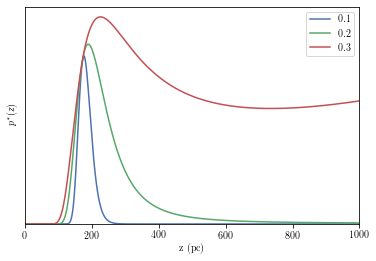

In [13]:
b = 60 * np.pi/180
parallax = 0.005

z = np.linspace(0, 1000, 1000)
for f in [0.1, 0.2, 0.3]:
    e_parallax = f * parallax
    pdf = z**2 * np.exp(-(parallax-np.sin(b)/z)**2/(2*e_parallax**2))
    plt.plot(z, pdf, label=f"{f}")
plt.xlabel("z (pc)")
plt.ylabel(r"$p^{*}(z)$")
plt.xlim(0, 1000)
plt.ylim(0)
plt.yticks([])
plt.legend()
plt.savefig(join("..", "img", "z-distribution.pdf"))
plt.show()

In [14]:
gaia = gaia[['parallax', 'e_parallax', 'GLAT']] 
gaia = gaia.dropna()
p = gaia['parallax'].to_numpy()/1000
p_err = gaia['e_parallax'].to_numpy()/1000
b = gaia['GLAT'].to_numpy() 
n = 50_000
z_arr = vertical.generate_z(p, p_err, b, n=n)
print("halo", z_arr.shape)

halo (50000, 2514)


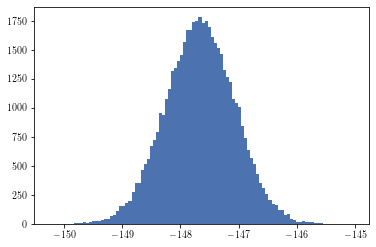

In [15]:
plt.hist(z_arr[:, 10], bins=100);

# Load the z distances

In [10]:
# files = glob(join(data_dir, "*.npy"))
# files.sort()
# files

['/home2/s20321005/Thesis-Project/Data/Vertical-Distance/no/gaia_(-0.10)_(0.13).npy']

(0.0, 1.0)

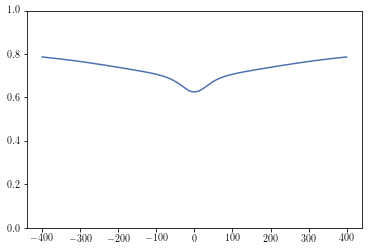

In [19]:
z = df_comp['z'].to_numpy()
frac = df_comp['frac'].to_numpy()
compz = interpolate.interp1d(z, frac, fill_value='extrapolate', bounds_error=False, kind="cubic")

plt.plot(z, frac)
plt.ylim(0,1)

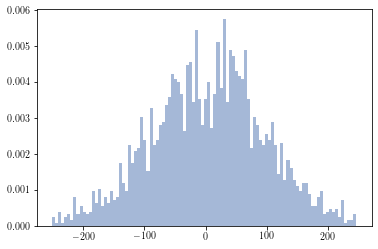

In [20]:
plt.hist(z_arr[1800], bins=100, density=True, alpha=0.5);

In [21]:
# zb = np.max(z)
zb = 250.0
zmax = np.minimum(np.max(z_arr), zb)
zmin = np.maximum(np.min(z_arr), -zb)
zmax, zmin

(250.0, -250.0)

In [22]:
zl = np.floor(np.maximum(zmin, -zb))
zu = np.ceil(np.minimum(zmax, zb))
zedge = np.linspace(zl, zu, 20)

gaia = vaex.open(spec_files[index])
zs = gaia['z'].to_numpy()
znum, _ = np.histogram(zs, bins=zedge)
zmid = (zedge[1:] + zedge[:-1])/2
comp = compz(zmid)
mask = (comp > 0)*(znum > 0)
znum = znum[mask]
zmid = zmid[mask]
zerr = np.sqrt(znum)

M = z_arr.shape[0]
znum_est = np.empty((M, len(znum)), dtype=int)
for i in tqdm(range(M)):
    z_realization = z_arr[i]
    znum_est_i = np.histogram(z_realization, bins=zedge)[0]
    znum_est[i] = znum_est_i[mask]

100%|██████████| 50000/50000 [00:08<00:00, 6241.75it/s]


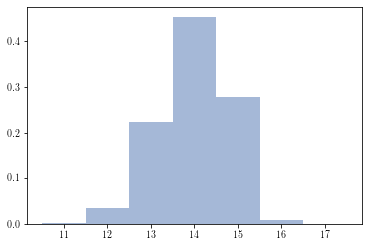

[11. 12. 13. 14. 15. 16. 17.] [1.2800e-03 3.5320e-02 2.2368e-01 4.5402e-01 2.7774e-01 7.9400e-03
 2.0000e-05]


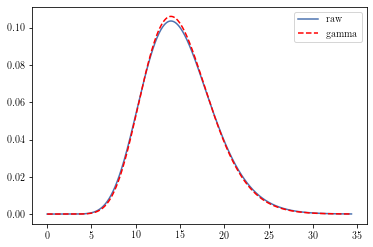

comp 0.7492307932990787
[13.98118658]


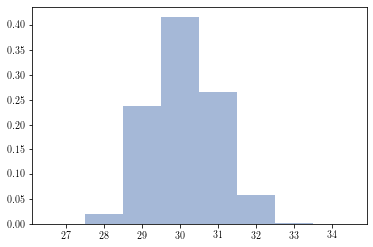

[27. 28. 29. 30. 31. 32. 33. 34.] [7.8000e-04 2.0980e-02 2.3632e-01 4.1652e-01 2.6478e-01 5.8740e-02
 1.8600e-03 2.0000e-05]


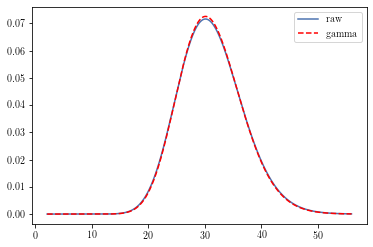

comp 0.7418800299186452
[30.09644585]


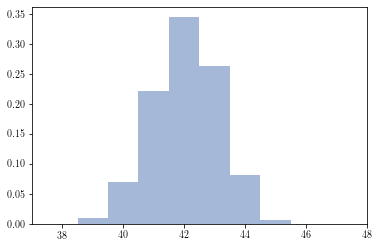

[38. 39. 40. 41. 42. 43. 44. 45. 46. 47.] [5.2000e-04 9.7600e-03 7.0200e-02 2.2156e-01 3.4532e-01 2.6408e-01
 8.1020e-02 7.2000e-03 3.2000e-04 2.0000e-05]


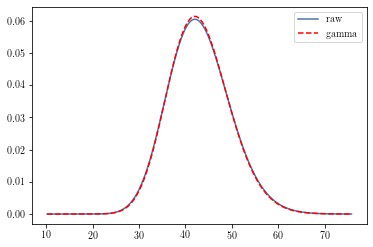

comp 0.7343294963961685
[42.04588678]


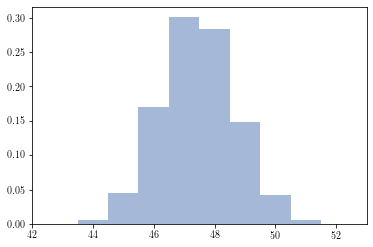

[43. 44. 45. 46. 47. 48. 49. 50. 51. 52.] [1.4000e-04 5.1400e-03 4.5580e-02 1.6942e-01 3.0108e-01 2.8306e-01
 1.4784e-01 4.2000e-02 5.3600e-03 3.8000e-04]


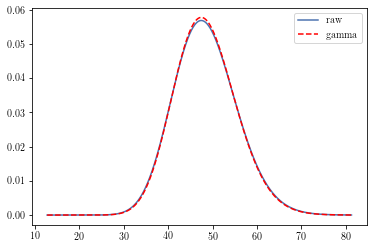

comp 0.7265663477636874
[47.43910092]


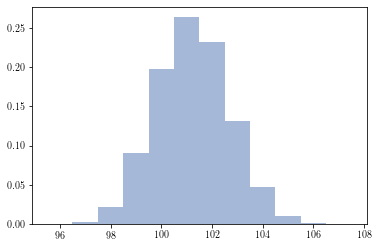

[ 96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107.] [8.0000e-05 2.9800e-03 2.2100e-02 9.0420e-02 1.9756e-01 2.6416e-01
 2.3188e-01 1.3148e-01 4.7160e-02 1.0440e-02 1.6400e-03 1.0000e-04]


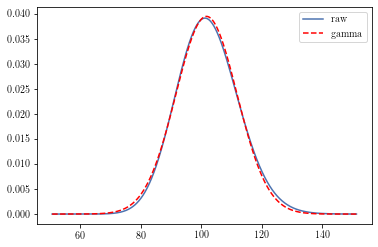

comp 0.7183575768516633
[101.72663742]


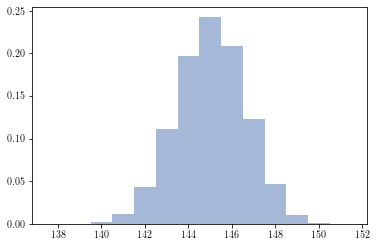

[138. 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151.] [2.0000e-05 1.4000e-04 2.3000e-03 1.2040e-02 4.3840e-02 1.1144e-01
 1.9652e-01 2.4270e-01 2.0890e-01 1.2308e-01 4.7200e-02 1.0420e-02
 1.3400e-03 6.0000e-05]


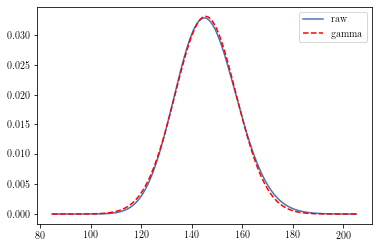

comp 0.7089847482802196
[145.53213477]


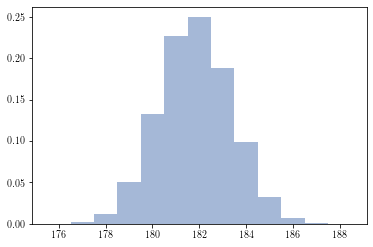

[176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188.] [2.2000e-04 1.8600e-03 1.2240e-02 5.0040e-02 1.3232e-01 2.2624e-01
 2.4970e-01 1.8824e-01 9.8280e-02 3.2720e-02 7.1000e-03 1.0200e-03
 2.0000e-05]


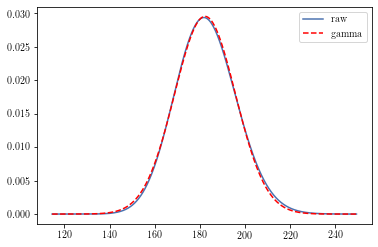

comp 0.6965351556843608
[182.31418093]


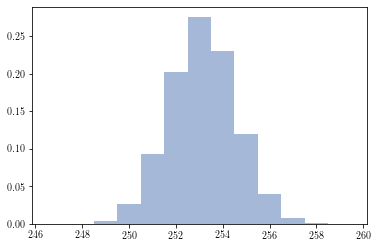

[247. 248. 249. 250. 251. 252. 253. 254. 255. 256. 257. 258. 259.] [2.0000e-05 3.6000e-04 3.8400e-03 2.6120e-02 9.2780e-02 2.0248e-01
 2.7590e-01 2.3078e-01 1.2004e-01 3.9320e-02 7.5800e-03 7.4000e-04
 4.0000e-05]


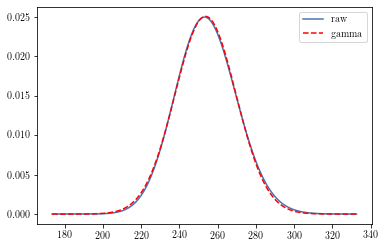

comp 0.6765028101879251
[253.63832839]


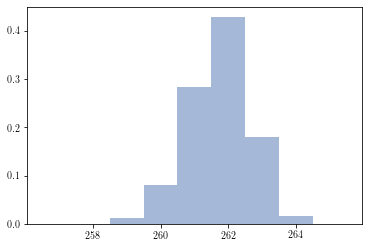

[257. 258. 259. 260. 261. 262. 263. 264. 265.] [2.0000e-05 8.0000e-04 1.1340e-02 7.9900e-02 2.8308e-01 4.2886e-01
 1.7984e-01 1.5960e-02 2.0000e-04]


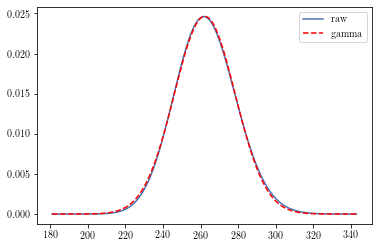

comp 0.6451827523061068
[262.23191826]


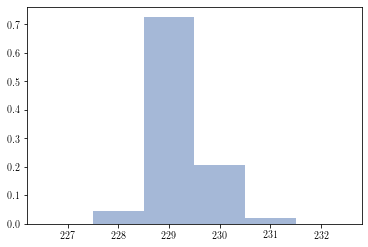

[227. 228. 229. 230. 231. 232.] [4.0000e-05 4.4060e-02 7.2666e-01 2.0850e-01 2.0220e-02 5.2000e-04]


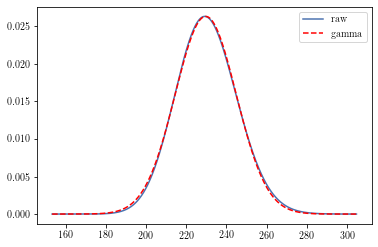

comp 0.6255766085589055
[229.7059918]


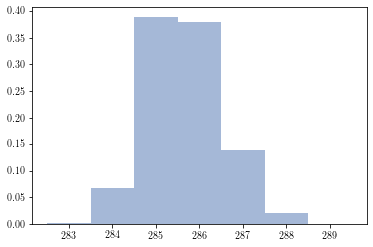

[283. 284. 285. 286. 287. 288. 289.] [0.00254 0.0677  0.38918 0.38022 0.13838 0.02118 0.0008 ]


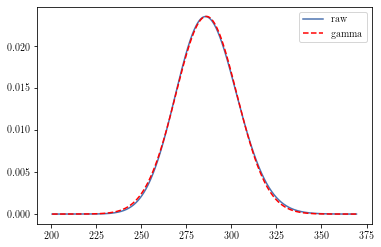

comp 0.6451827523061067
[286.1503824]


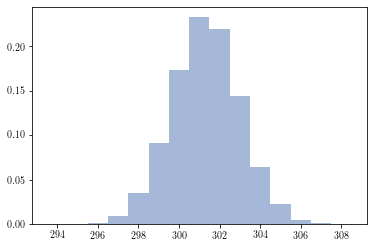

[294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306. 307.
 308.] [2.0000e-05 1.2000e-04 1.4400e-03 8.7400e-03 3.4800e-02 9.1060e-02
 1.7368e-01 2.3340e-01 2.2006e-01 1.4438e-01 6.4240e-02 2.2560e-02
 4.5200e-03 8.2000e-04 1.6000e-04]


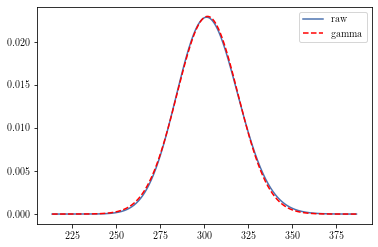

comp 0.6765028101879251
[301.8160011]


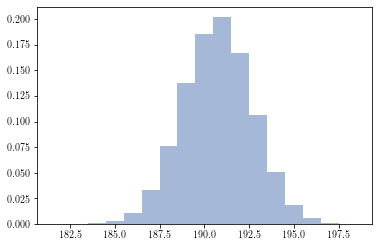

[182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198.] [2.0000e-05 1.0000e-04 7.2000e-04 2.8200e-03 1.0820e-02 3.3340e-02
 7.6320e-02 1.3736e-01 1.8534e-01 2.0238e-01 1.6704e-01 1.0674e-01
 5.1060e-02 1.8880e-02 5.5600e-03 1.4000e-03 1.0000e-04]


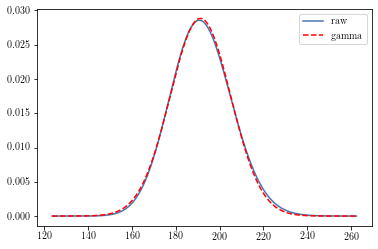

comp 0.6965351556843605
[191.24444847]


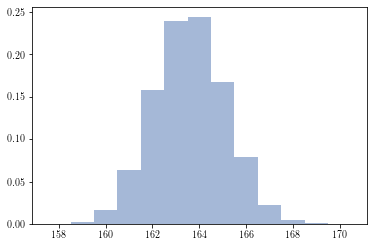

[158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170.] [2.8000e-04 2.4600e-03 1.6740e-02 6.3660e-02 1.5804e-01 2.3982e-01
 2.4438e-01 1.6786e-01 7.9240e-02 2.2480e-02 4.3600e-03 6.4000e-04
 4.0000e-05]


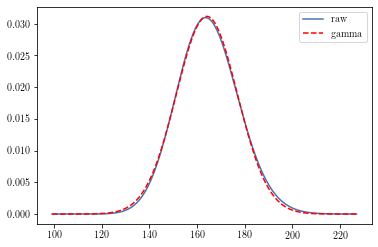

comp 0.7089847482802196
[164.08478827]


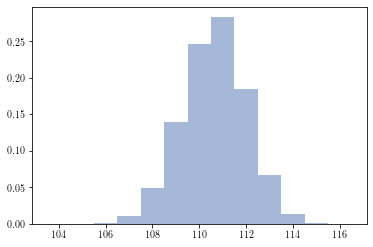

[104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116.] [4.0000e-05 2.4000e-04 1.5000e-03 1.1200e-02 4.9360e-02 1.3960e-01
 2.4682e-01 2.8372e-01 1.8552e-01 6.7740e-02 1.3100e-02 1.0600e-03
 1.0000e-04]


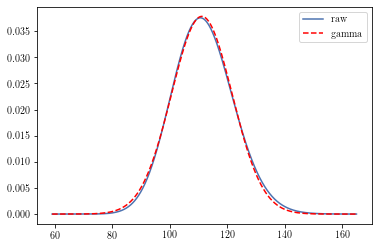

comp 0.7183575768516636
[111.13548638]


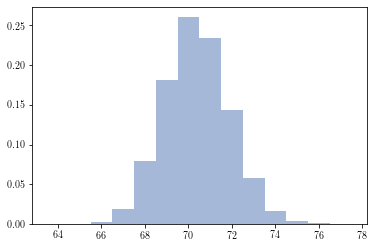

[64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77.] [2.0000e-05 1.0000e-04 2.4600e-03 1.9260e-02 7.8840e-02 1.8150e-01
 2.6088e-01 2.3426e-01 1.4366e-01 5.8060e-02 1.6840e-02 3.4200e-03
 6.8000e-04 2.0000e-05]


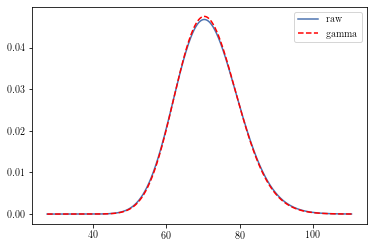

comp 0.7265663477636877
[70.36368444]


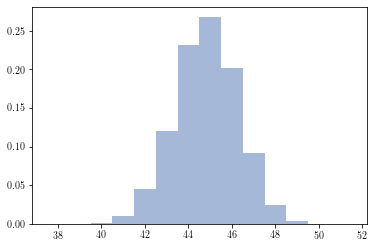

[38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51.] [2.0000e-05 1.0000e-04 1.7800e-03 1.0040e-02 4.4780e-02 1.2056e-01
 2.3188e-01 2.6792e-01 2.0232e-01 9.1460e-02 2.5060e-02 3.8000e-03
 2.6000e-04 2.0000e-05]


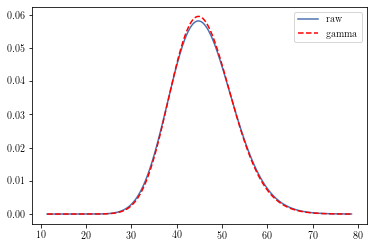

comp 0.7343294963961682
[44.80409832]


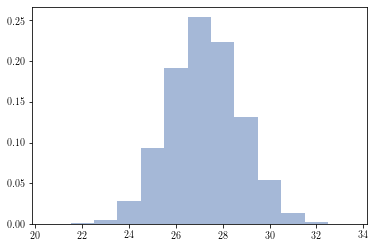

[21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.] [6.0000e-05 6.4000e-04 5.3000e-03 2.8420e-02 9.3880e-02 1.9208e-01
 2.5436e-01 2.2382e-01 1.3122e-01 5.3940e-02 1.3840e-02 2.1800e-03
 2.6000e-04]


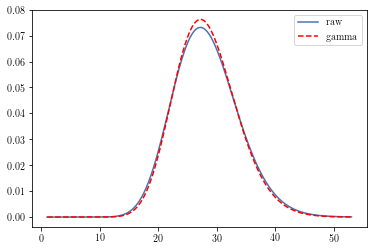

comp 0.7418800299186452
[27.1946523]


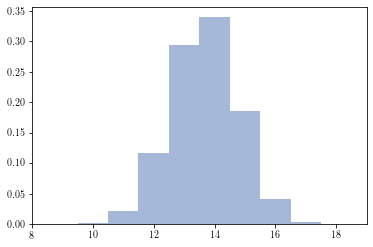

[ 9. 10. 11. 12. 13. 14. 15. 16. 17. 18.] [2.0000e-05 1.2200e-03 2.0620e-02 1.1580e-01 2.9318e-01 3.4018e-01
 1.8562e-01 4.0800e-02 2.5200e-03 4.0000e-05]


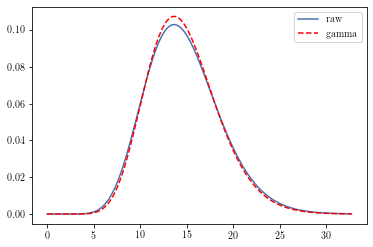

comp 0.7492307932990788
[13.65374588]


In [23]:
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import curve_fit

def p_approx(x, n):
    if n > 100:
        return norm.pdf(x, loc=n, scale=np.sqrt(n))
    return np.power(x, n)*np.exp(-x)/gamma(n+1)

z_est = np.empty_like(znum, dtype=float)
z_comp = np.empty_like(znum, dtype=float)
for i in range(len(zmid)):
    # if i < 1:
    #     continue
    nz_min = np.floor(znum_est[:, i].min())
    nz_max = np.ceil(znum_est[:, i].max())
    bins = np.arange(nz_min-1/2, nz_max+1)
    zweight, n_edge = np.histogram(znum_est[:, i], bins=bins, density=True)
    ns = (n_edge[1:] + n_edge[:-1]) / 2
    mask = zweight > 0
    zweight = zweight[mask]
    ns = ns[mask]
    plt.bar(ns, zweight, width=1, alpha=0.5)
    plt.show()
    print(ns, zweight)
    m = 5
    comp = compz(zmid[i])
    lambdas = np.linspace(np.maximum(0, znum[i]-m*np.sqrt(znum[i])), znum[i]+m*np.sqrt(znum[i]), 10_000)
    pn = np.sum(zweight[:, None]*poisson.pmf(ns[:,None], lambdas[None, :]), axis=0)
    area = np.trapz(pn, lambdas)
    pn = pn / area
    popt_g, _ = curve_fit(p_approx, lambdas, pn, p0=[znum[i]])
    plt.plot(lambdas, pn, label='raw')
    plt.plot(lambdas, p_approx(lambdas, *popt_g), label='gamma', ls="--", c='r')
    # plt.plot(lambdas_0, poisson.pmf(znum[i], lambdas_0), 'C1')
    plt.legend()
    plt.show()
    print("comp", comp)
    print(popt_g)
    z_est[i] = popt_g[0]
    z_comp[i] = comp
    # break

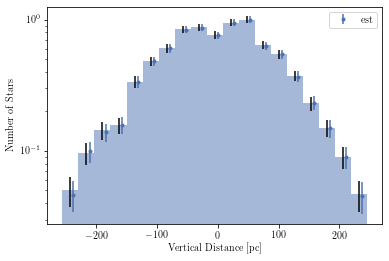

In [26]:
dz = np.min(np.diff(zedge))
plt.bar(zmid-5, znum/znum.max(), yerr=np.sqrt(znum)/znum.max(), width=dz, alpha=0.5)
plt.errorbar(zmid, z_est/z_est.max(), yerr=np.sqrt(z_est)/z_est.max(), fmt='.', label="est")
plt.xlabel("Vertical Distance [pc]")
plt.ylabel("Number of Stars")
plt.legend()
plt.yscale('log')
plt.show()

In [28]:
df = vaex.from_arrays(mid=zmid, num=z_est, com=z_comp)
df

#,mid,num,com
0,-236.8421052631579,13.981186577154489,0.7492307932990787
1,-210.5263157894737,30.096445847334053,0.7418800299186452
2,-184.21052631578948,42.045886775619024,0.7343294963961685
3,-157.89473684210526,47.43910092473803,0.7265663477636874
4,-131.57894736842107,101.72663741842454,0.7183575768516633
...,...,...,...
14,131.578947368421,111.13548638228032,0.7183575768516636
15,157.89473684210523,70.36368443823957,0.7265663477636877
16,184.21052631578945,44.80409831840218,0.7343294963961682
17,210.52631578947367,27.194652299134162,0.7418800299186452


In [29]:
name = spec_files[index].split("/")[-1].replace(".npy", ".hdf5").replace("gaia", "z")
name

'z_(-0.019)_(0.127).hdf5'

# all of them

In [11]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
from scipy import interpolate
from glob import glob
import sys
from hammer import vertical
from tqdm import tqdm
from scipy.stats import norm, poisson
from scipy.integrate import simps

In [12]:
root_dir = abspath(join(pardir, pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [13]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number/no',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [14]:
from utils import safe_mkdir, style

style()

In [15]:
root_data_dir = abspath(join(root_dir, "Data"))
name = "no"
spectral_dir = join(root_data_dir, "Color", name)
comp_dir = join(root_data_dir, "Effective-Volume", name)

In [16]:
data_dir = join(root_data_dir, "Vertical-Number")
safe_mkdir(data_dir)
data_dir = join(root_data_dir, "Vertical-Number", "no")
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Vertical-Number already exist. Good to go!
Directory /home2/s20321005/Thesis-Project/Data/Vertical-Number/no already exist. Good to go!


In [17]:
comp_files = glob(join(comp_dir, "*.hdf5"))
comp_files.sort()

In [18]:
spec_files = glob(join(spectral_dir, "*.hdf5"))
spec_files.sort()

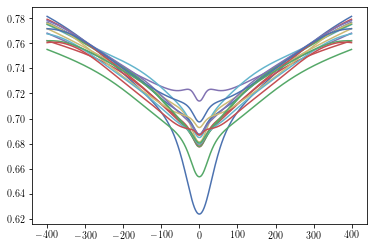

In [19]:
for file in comp_files:
    df_comp = vaex.open(file)
    z = df_comp['z'].to_numpy()
    frac = df_comp['frac'].to_numpy()
    plt.plot(z, frac)

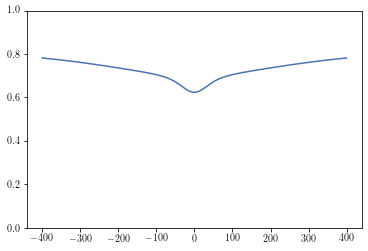

generating


100%|██████████| 50000/50000 [00:08<00:00, 5969.19it/s]


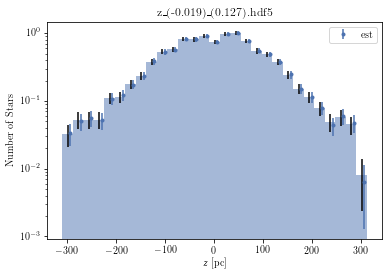

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

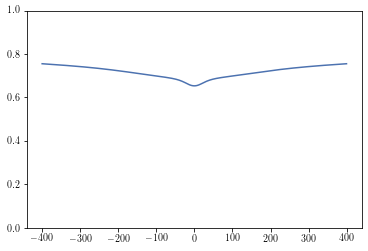

generating


100%|██████████| 50000/50000 [00:09<00:00, 5103.34it/s]


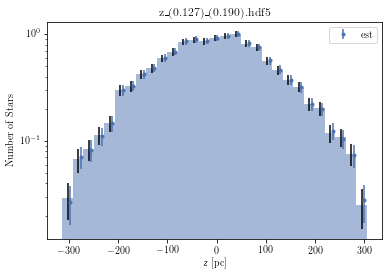

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

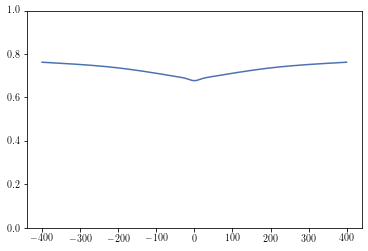

generating


100%|██████████| 50000/50000 [00:10<00:00, 4832.00it/s]


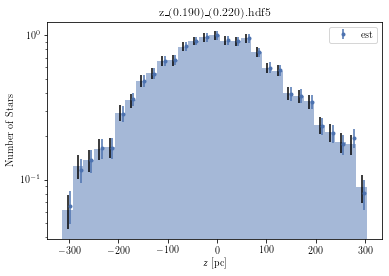

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

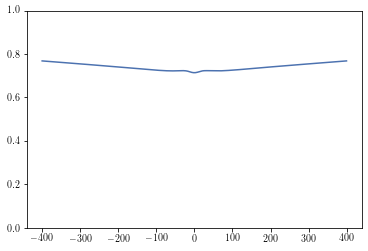

generating


100%|██████████| 50000/50000 [00:11<00:00, 4533.69it/s]


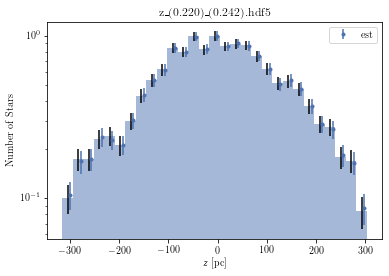

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

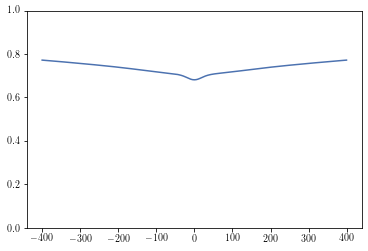

generating


100%|██████████| 50000/50000 [00:11<00:00, 4318.73it/s]


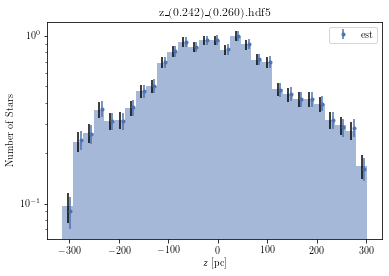

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

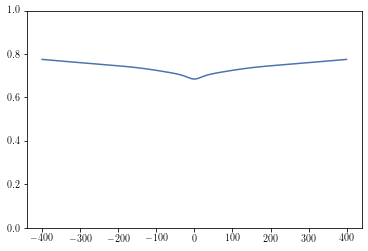

generating


100%|██████████| 50000/50000 [00:12<00:00, 4021.40it/s]


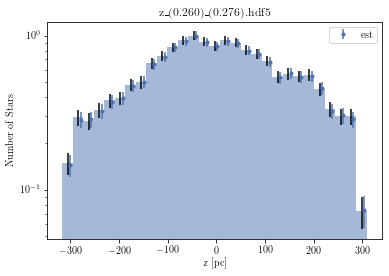

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

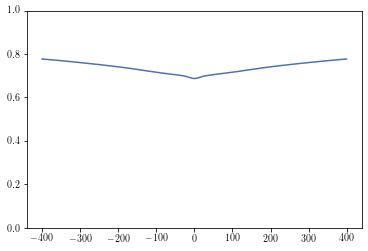

generating


100%|██████████| 50000/50000 [00:12<00:00, 4027.46it/s]


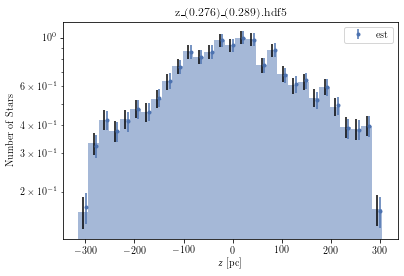

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

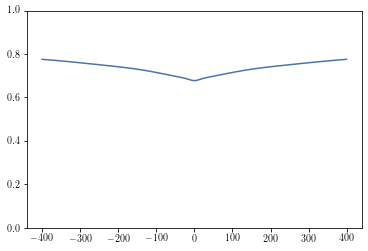

generating


100%|██████████| 50000/50000 [00:13<00:00, 3779.83it/s]


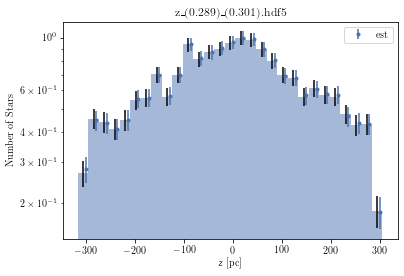

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

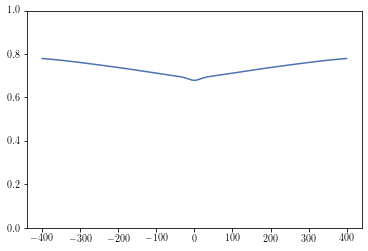

generating


100%|██████████| 50000/50000 [00:14<00:00, 3476.04it/s]


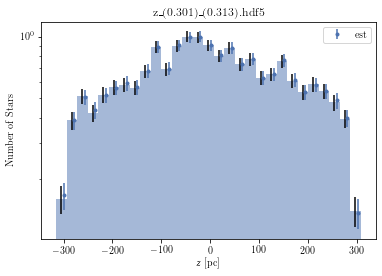

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

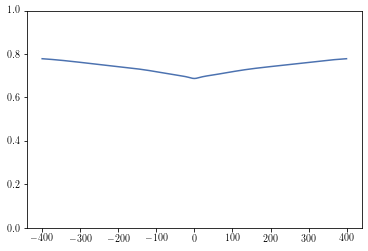

generating


100%|██████████| 50000/50000 [00:15<00:00, 3297.87it/s]


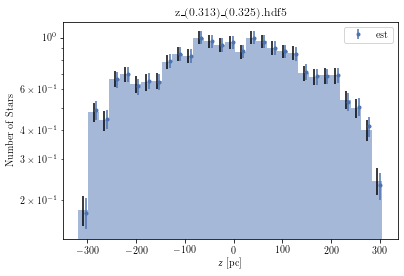

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

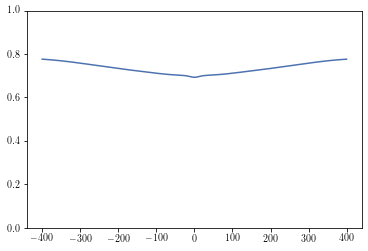

generating


100%|██████████| 50000/50000 [00:13<00:00, 3603.59it/s]


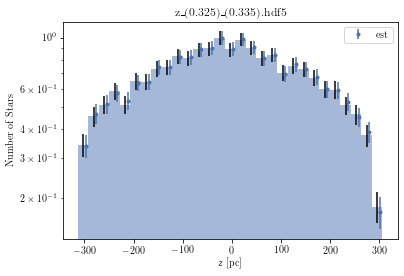

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

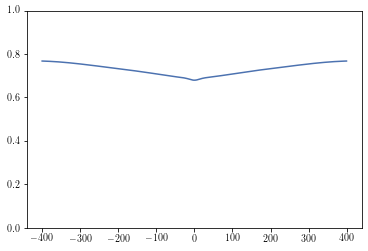

generating


100%|██████████| 50000/50000 [00:14<00:00, 3537.27it/s]


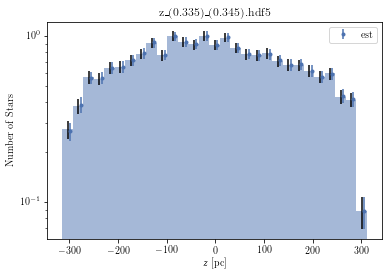

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

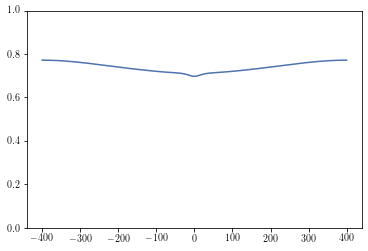

generating


100%|██████████| 50000/50000 [00:14<00:00, 3383.78it/s]


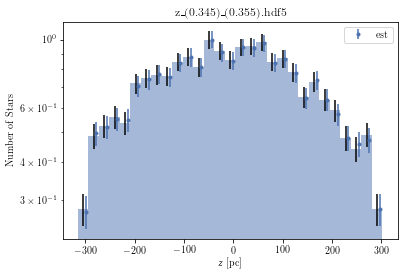

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

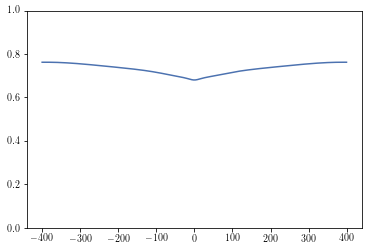

generating


100%|██████████| 50000/50000 [00:15<00:00, 3316.04it/s]


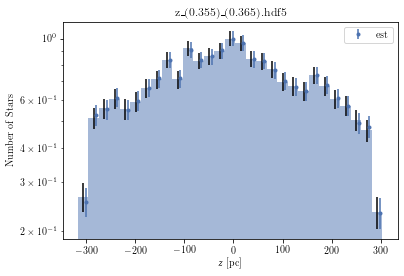

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

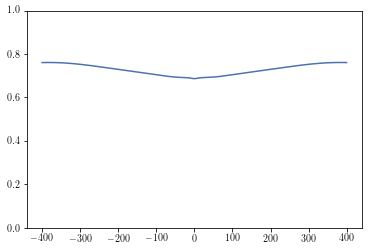

generating


100%|██████████| 50000/50000 [00:14<00:00, 3484.12it/s]


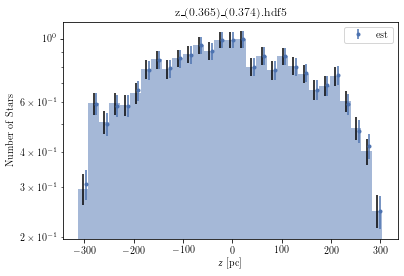

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

In [20]:
from scipy.interpolate import interp1d
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import curve_fit

def p_approx(x, n):
    if n > 100:
        return norm.pdf(x, loc=n, scale=np.sqrt(n))
    return np.power(x, n)*np.exp(-x)/gamma(n+1)

for index, file in enumerate(spec_files):
    gaia = vaex.open(file)
    gaia = gaia[['parallax', 'e_parallax', 'GLAT']]
    gaia = gaia.dropna()
    df_comp = vaex.open(comp_files[index])
    z = df_comp['z'].to_numpy()
    frac = df_comp['frac'].to_numpy()
    plt.plot(z, frac)
    plt.ylim(0,1)
    plt.show()
    # continue
    p = gaia['parallax'].to_numpy()/1000
    p_err = gaia['e_parallax'].to_numpy()/1000
    b = gaia['GLAT'].to_numpy()
    n = 50_000
    z_arr = vertical.generate_z(p, p_err, b, n=n)
    
    compz = interp1d(z, frac, fill_value='extrapolate', bounds_error=False, kind="cubic")
    zb = np.max(z)
    zmax = np.max(z_arr)
    zmin = np.min(z_arr)
    zl = np.floor(np.maximum(zmin, -zb))
    zu = np.ceil(np.minimum(zmax, zb))
    zedge = np.linspace(zl, zu, 30)

    gaia = vaex.open(spec_files[index])
    zs = gaia['z'].to_numpy()
    znum, _ = np.histogram(zs, bins=zedge)
    zmid = (zedge[1:] + zedge[:-1])/2
    comp = compz(zmid)
    mask = (comp > 0)*(znum > 0)
    znum = znum[mask]
    zmid = zmid[mask]
    M = z_arr.shape[0]
    znum_est = np.empty((M, len(znum)), dtype=int)
    print("generating")
    for i in tqdm(range(M)):
        z_realization = z_arr[i]
        znum_est_i = np.histogram(z_realization, bins=zedge)[0]
        znum_est[i] = znum_est_i[mask]
    z_est = np.empty_like(znum, dtype=float)
    z_comp = np.empty_like(znum, dtype=float)
    for i in range(len(zmid)):
        nz_min = np.floor(znum_est[:, i].min())
        nz_max = np.ceil(znum_est[:, i].max())
        bins = np.arange(nz_min-1/2, nz_max+1)
        zweight, n_edge = np.histogram(znum_est[:, i], bins=bins, density=True)
        ns = (n_edge[1:] + n_edge[:-1]) / 2
        mask = zweight > 0
        zweight = zweight[mask]
        ns = ns[mask]
        m = 5
        comp = compz(zmid[i])
        lambdas = np.linspace(np.maximum(0, znum[i]-m*np.sqrt(znum[i])), znum[i]+m*np.sqrt(znum[i]), 10_000)
        pn = np.sum(zweight[:, None]*poisson.pmf(ns[:,None], lambdas[None, :]), axis=0)
        area = np.trapz(pn, lambdas)
        pn = pn / area
        popt_g, _ = curve_fit(p_approx, lambdas, pn, p0=[znum[i]])
        z_est[i] = popt_g[0]
        z_comp[i] = comp
    dz = np.min(np.diff(zedge))
    name = file.split("/")[-1].replace("gaia", "z")
    plt.bar(zmid-5, znum/znum.max(), yerr=np.sqrt(znum)/znum.max(), width=dz, alpha=0.5)
    plt.errorbar(zmid, z_est/z_est.max(), yerr=np.sqrt(z_est)/z_est.max(), fmt='.', label="est")
    plt.xlabel(r"$z$ [pc]")
    plt.ylabel("Number of Stars")
    plt.legend()
    plt.title(name)
    plt.yscale('log')
    plt.show()
    df = vaex.from_arrays(mid=zmid, num=z_est, com=z_comp)
    df.export(join(data_dir, name), progress=True)
    # break
# df